In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


# Data Preprocesing

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

## games.csv

### Assesin data

In [66]:
games_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/games.csv')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


In [67]:
games_df.describe(include="all")

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136,136,136,136,136.000000,136.000000
unique,NaN,NaN,NaN,27,8,32,32,NaN,NaN
top,NaN,NaN,NaN,10/9/2022,13:00:00,NO,BUF,NaN,NaN
freq,NaN,NaN,NaN,14,73,6,5,NaN,NaN
mean,2.022099e+09,2022.0,4.845588,NaN,NaN,NaN,NaN,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,NaN,NaN,NaN,NaN,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,NaN,NaN,NaN,NaN,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,NaN,NaN,NaN,NaN,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,NaN,NaN,NaN,NaN,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,NaN,NaN,NaN,NaN,27.000000,27.000000


In [68]:
games_df.head(20)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23
5,2022091104,2022,1,9/11/2022,13:00:00,DET,PHI,35,38
6,2022091105,2022,1,9/11/2022,13:00:00,HOU,IND,20,20
7,2022091106,2022,1,9/11/2022,13:00:00,MIA,NE,20,7
8,2022091107,2022,1,9/11/2022,13:00:00,NYJ,BAL,9,24
9,2022091109,2022,1,9/11/2022,13:00:00,WAS,JAX,28,22


In [69]:
games_df.isna().sum()

gameId               0
season               0
week                 0
gameDate             0
gameTimeEastern      0
homeTeamAbbr         0
visitorTeamAbbr      0
homeFinalScore       0
visitorFinalScore    0
dtype: int64

In [70]:
print("Jumlah data duplikat: ", games_df.duplicated().sum())

Jumlah data duplikat:  0


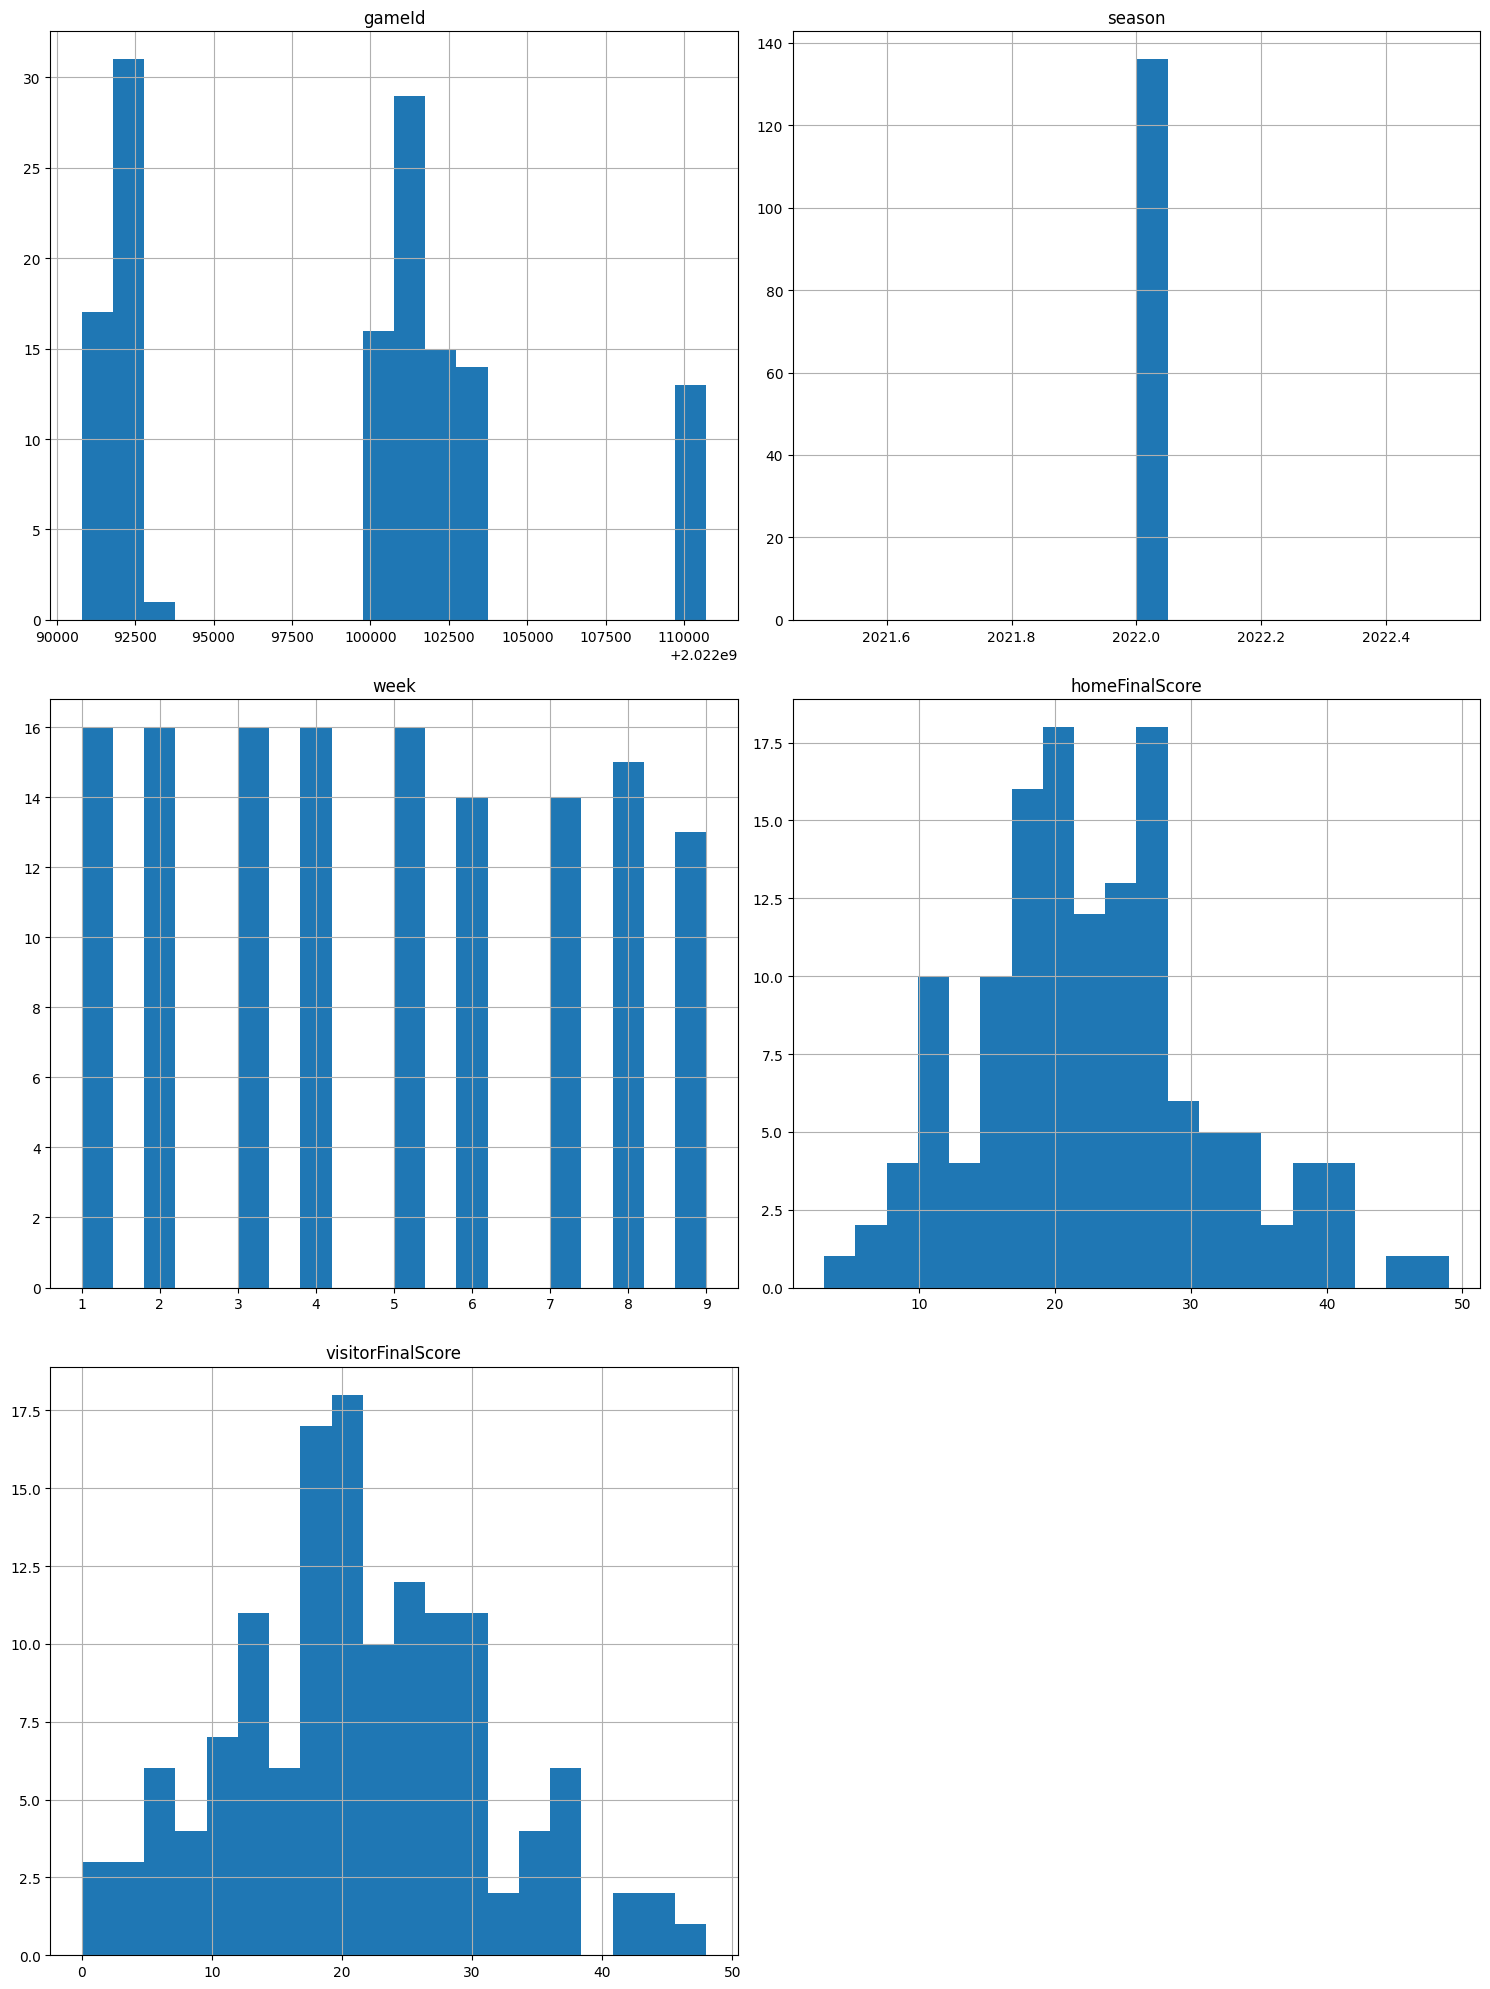

In [71]:
games_df.hist(bins=20, figsize=(15, 20))
plt.tight_layout()
plt.show()

**Insight: **
- tipe data gameDate masih object
- Tipe data gameTimeEastern masih object
- Tidak ada missing value
- Tidak ada duplicated data
- Belum ada kolom pemenang setiap pertandingan
- Belum ada kolom kalah di setiap pertandingan
- Perlu adanya kolom berisi kategori pertandingan (sengit, biasa saja, terpaut jauh)

### Cleaning and exploring the data

Mengubah tipe data 'gameDate' menjadi datetime

In [72]:

games_df['gameDate'] = pd.to_datetime(games_df['gameDate'])
#games_df['gameTimeEastern'] = pd.to_datetime(games_df['gameTimeEastern'],format='%H:%M:%S').dt.time

Menambahkan kolom pemenang dan kalah pertandingan

In [73]:
games_df['win']= games_df.apply(
    lambda row: row['homeTeamAbbr'] if row['homeFinalScore'] > row['visitorFinalScore']
    else row['visitorTeamAbbr'] if row['homeFinalScore'] < row['visitorFinalScore'] else "none",
    axis=1
)

In [74]:
games_df['lose']= games_df.apply(
    lambda row: row['homeTeamAbbr'] if row['homeFinalScore'] < row['visitorFinalScore'] else 
    row['visitorTeamAbbr'] if row['homeFinalScore'] > row['visitorFinalScore'] else "none",
    axis=1
)

In [75]:
games_df['score_dif'] = games_df['homeFinalScore'] - games_df['visitorFinalScore']
games_df['score_dif'] = games_df['score_dif'].abs()

In [76]:
print("Jumlah pertandingan seri: ", (games_df['win'] == 'none').sum())
games_df[games_df['win'] == 'none']

Jumlah pertandingan seri:  1


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,win,lose,score_dif
6,2022091105,2022,1,2022-09-11,13:00:00,HOU,IND,20,20,none,none,0


Terdapat sebuah pertandingan dengan hasil seri pada pertandingan dengan gameId (2022091105)

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = games_df['score_dif']

kmeans = KMeans(n_clusters=3, random_state=42)

games_df['cluster'] = kmeans.fit_predict(games_df[['score_dif']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

cluster centers : [[14.22857143]
 [ 4.41666667]
 [24.29411765]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


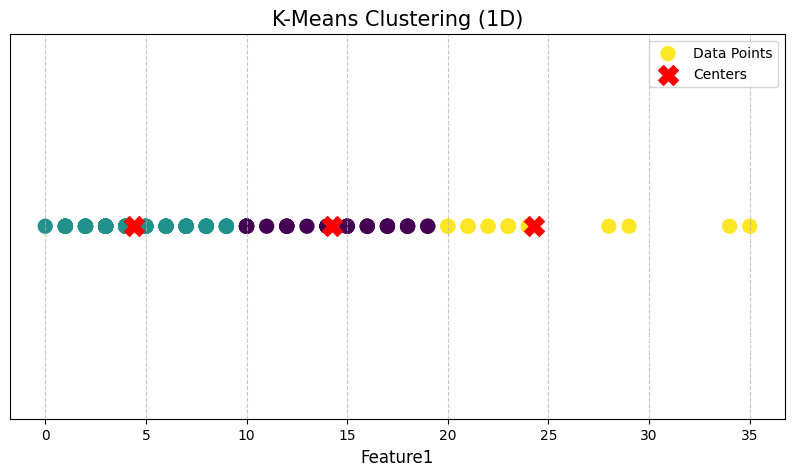

In [78]:
plt.figure(figsize=(10, 5))
plt.scatter(games_df['score_dif'], [0] * len(games_df), c=games_df['cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [79]:
games_df.groupby(by='cluster').gameId.nunique()

cluster
0    35
1    84
2    17
Name: gameId, dtype: int64

In [80]:
games_df['pertandingan'] = games_df.apply(
    lambda row: 'close_game' if row['cluster'] == 1 else 'standard_contest' if row['cluster'] == 0 else 'blowout',
    axis=1
)

<Axes: >

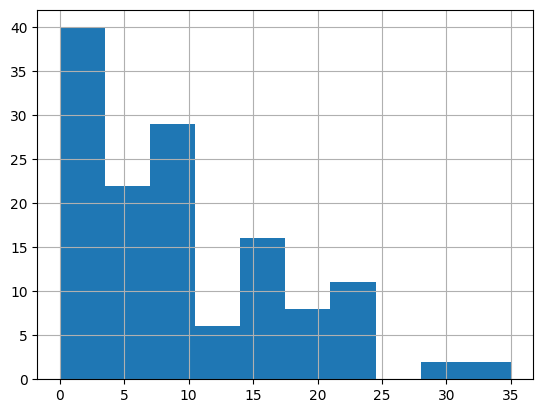

In [81]:
games_df.score_dif.hist()

In [82]:
games_df

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,win,lose,score_dif,cluster,pertandingan
0,2022090800,2022,1,2022-09-08,20:20:00,LA,BUF,10,31,BUF,LA,21,2,blowout
1,2022091100,2022,1,2022-09-11,13:00:00,ATL,NO,26,27,NO,ATL,1,1,close_game
2,2022091101,2022,1,2022-09-11,13:00:00,CAR,CLE,24,26,CLE,CAR,2,1,close_game
3,2022091102,2022,1,2022-09-11,13:00:00,CHI,SF,19,10,CHI,SF,9,1,close_game
4,2022091103,2022,1,2022-09-11,13:00:00,CIN,PIT,20,23,PIT,CIN,3,1,close_game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,2022-11-06,13:00:00,WAS,MIN,17,20,MIN,WAS,3,1,close_game
132,2022110608,2022,9,2022-11-06,16:05:00,ARI,SEA,21,31,SEA,ARI,10,0,standard_contest
133,2022110609,2022,9,2022-11-06,16:25:00,TB,LA,16,13,TB,LA,3,1,close_game
134,2022110610,2022,9,2022-11-06,20:20:00,KC,TEN,20,17,KC,TEN,3,1,close_game


Dari data homeFinalScore dan visitorFinalScore, kita bisa mendapat insight jalannya pertandingan dengan mengetahui selisih score yang didapatkan team pemenang dan team kalah. Selanjutnya dilakukan clustering terhadap data selisih score tersebut menjadi tiga cluster. Cluster ini membagi jalannya pertandinga kedalam kategori yang memiliki center cluster sebagai berikut close_game(4.41666667), standard_contes(14.22857143), dan blowout(24.29411765).5]

### Visualization

Visual:
- Peraih skor tertinggi per pertandingan
- Akumulasi skor tertinggi
- Pertandingan dengan jumlah skor terbanyak
- Team paling sering menang
- Team paling sering kalah
- Jalannya pertandingan (masing-masing jumlah pertandinagn intens, normal, terpaut jauh)

**Peraih skor tertinggi per pertandingan**

In [83]:
score_home_df = pd.DataFrame(games_df[['homeTeamAbbr', 'homeFinalScore']])
score_visitor_df = pd.DataFrame(games_df[['visitorTeamAbbr', 'visitorFinalScore']])

In [84]:
score_home_df.rename(columns={'homeTeamAbbr': 'team', 'homeFinalScore': 'score'}, inplace=True)
score_visitor_df.rename(columns={'visitorTeamAbbr': 'team', 'visitorFinalScore': 'score'}, inplace=True)

In [85]:
score_df = pd.concat([score_home_df, score_visitor_df])
score_df

,team,score
0,LA,10
1,ATL,26
2,CAR,24
3,CHI,19
4,CIN,20
...,...,...
131,MIN,20
132,SEA,31
133,LA,13
134,TEN,17


In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)

score_df['cluster'] = kmeans.fit_predict(score_df[['score']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

cluster centers : [[23.39230769]
 [12.27659574]
 [36.1875    ]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


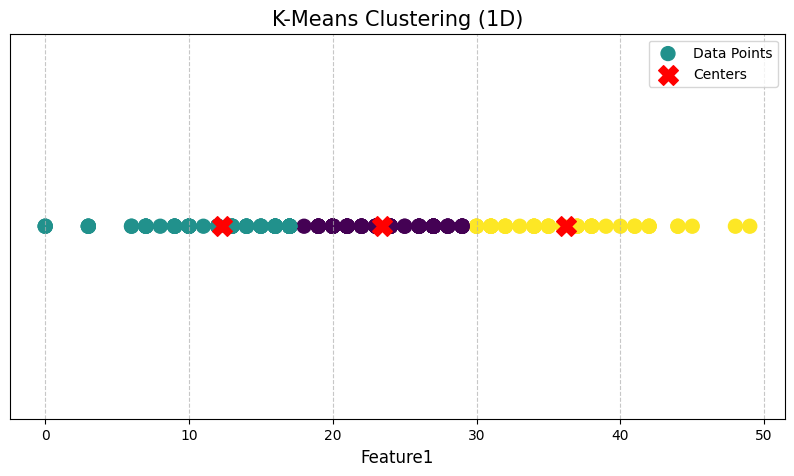

In [87]:
plt.figure(figsize=(10, 5))
plt.scatter(score_df['score'], [0] * len(score_df), c=score_df['cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [88]:
score_df.groupby(by='cluster').team.count()

cluster
0    130
1     94
2     48
Name: team, dtype: int64

In [89]:
score_df = score_df.sort_values(by='score', ascending=False)
score_df.head(5)

,team,score,cluster
111,DAL,49,2
53,SEA,48,2
53,DET,45,2
10,KC,44,2
105,KC,44,2


In [90]:
score_df = score_df.sort_values(by='score', ascending=True)
score_df.head(5)

,team,score,cluster
70,DET,0,1
114,LV,0,1
20,IND,0,1
14,DAL,3,1
129,IND,3,1


In [91]:
score_df.groupby(by='cluster').agg({
    'score': ['max','min', 'count', 'sum']
})

score                
          max min count   sum
cluster                      
0          29  18   130  3041
1          17   0    94  1154
2          49  30    48  1737

In [92]:
score_df.head()

,team,score,cluster
70,DET,0,1
114,LV,0,1
20,IND,0,1
14,DAL,3,1
129,IND,3,1


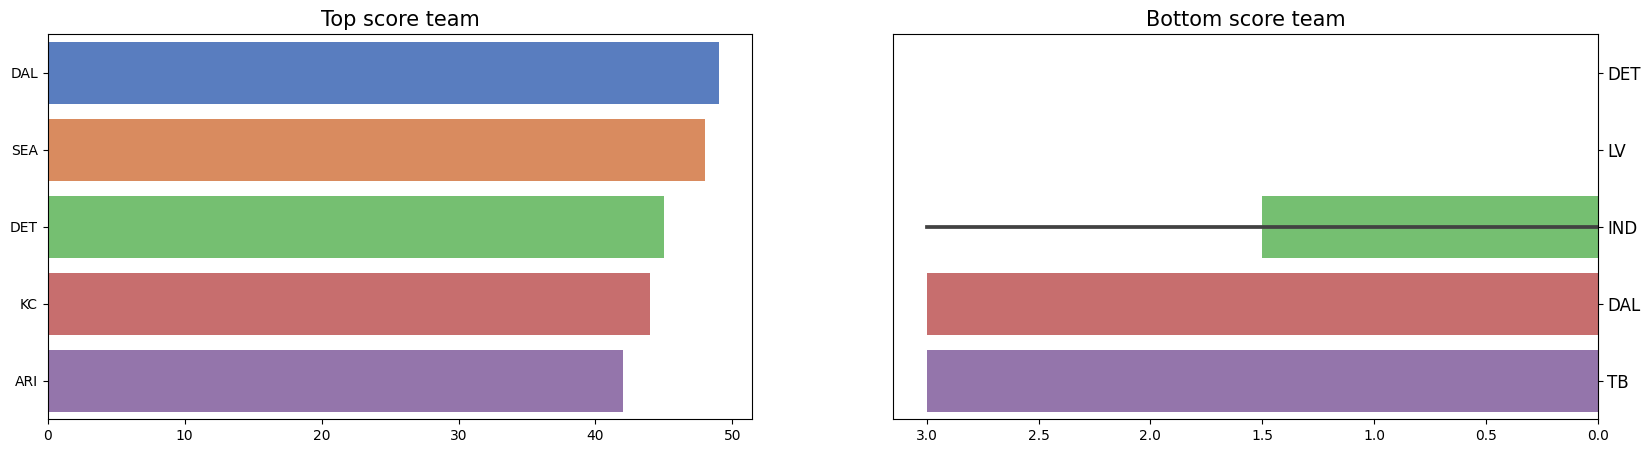

In [93]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="score", y="team", data=score_df.sort_values(by='score', ascending=False).head(6), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top score team", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="score", y="team", data=score_df.sort_values(by='score', ascending=True).head(6), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom score team", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

**Akumulasi skor tertinggi dan terrendah**auh)

In [94]:
agg_score_df = score_df.groupby(by='team').score.sum().sort_values(ascending=False).reset_index()
agg_score_df.head(5)

,team,score
0,KC,243
1,SEA,241
2,BAL,235
3,CIN,228
4,PHI,225


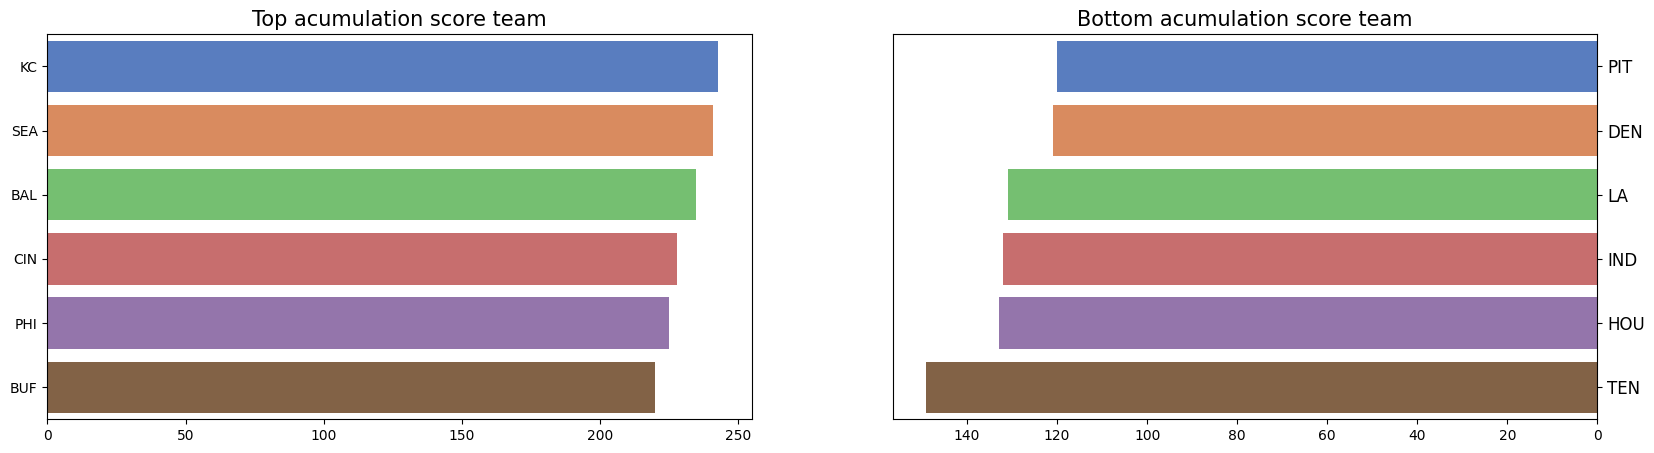

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="score", y="team", data=agg_score_df.sort_values(by='score', ascending=False).head(6), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top acumulation score team", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="score", y="team", data=agg_score_df.sort_values(by='score', ascending=True).head(6), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom acumulation score team", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

In [96]:
len(agg_score_df)

32

**Pertandingan dengan jumlah skor terbanyak dan tersedikit**


In [97]:
games_df['total_score'] = games_df['homeFinalScore'] + games_df['visitorFinalScore']

In [98]:
total_score_games_df = pd.DataFrame({'match' : games_df['homeTeamAbbr'] + " vs " + games_df['visitorTeamAbbr'], 'total_score': games_df['total_score'],})

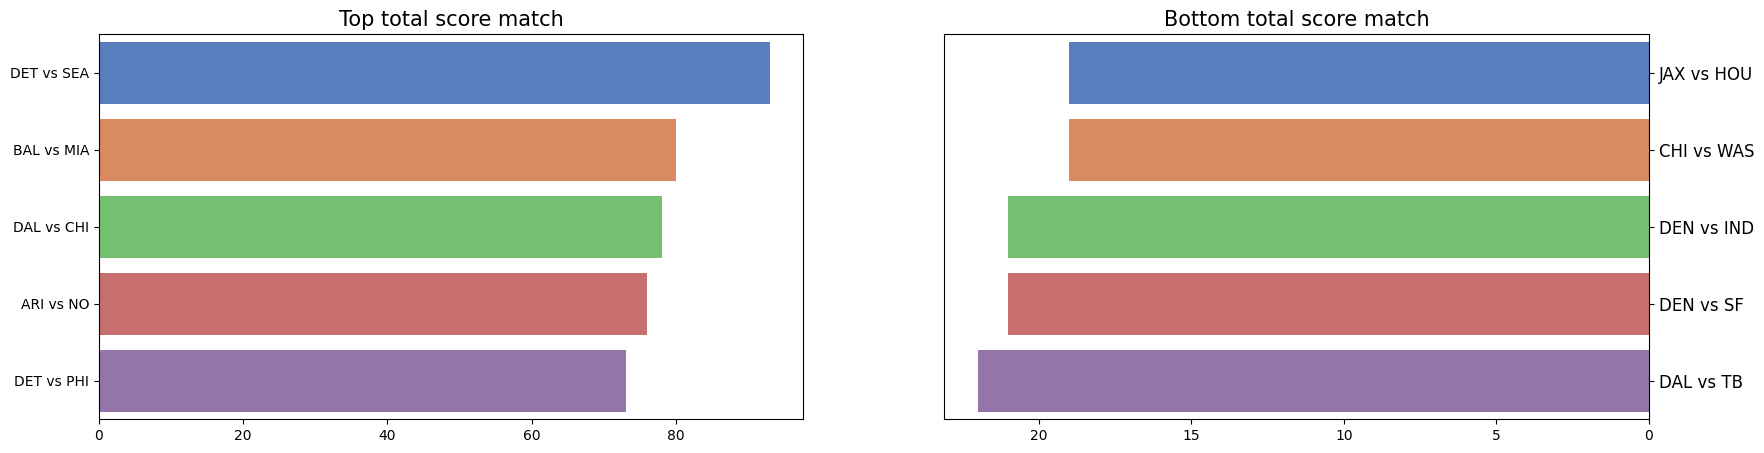

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="total_score", y="match", data=total_score_games_df.sort_values(by='total_score', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top total score match", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="total_score", y="match", data=total_score_games_df.sort_values(by='total_score', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom total score match", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

**Team paling sering menang dan kalah**


In [100]:
win_games_df = games_df.groupby(by='win').gameId.nunique().sort_values(ascending=False).reset_index()
lose_games_df = games_df.groupby(by='lose').gameId.nunique().sort_values(ascending=False).reset_index()

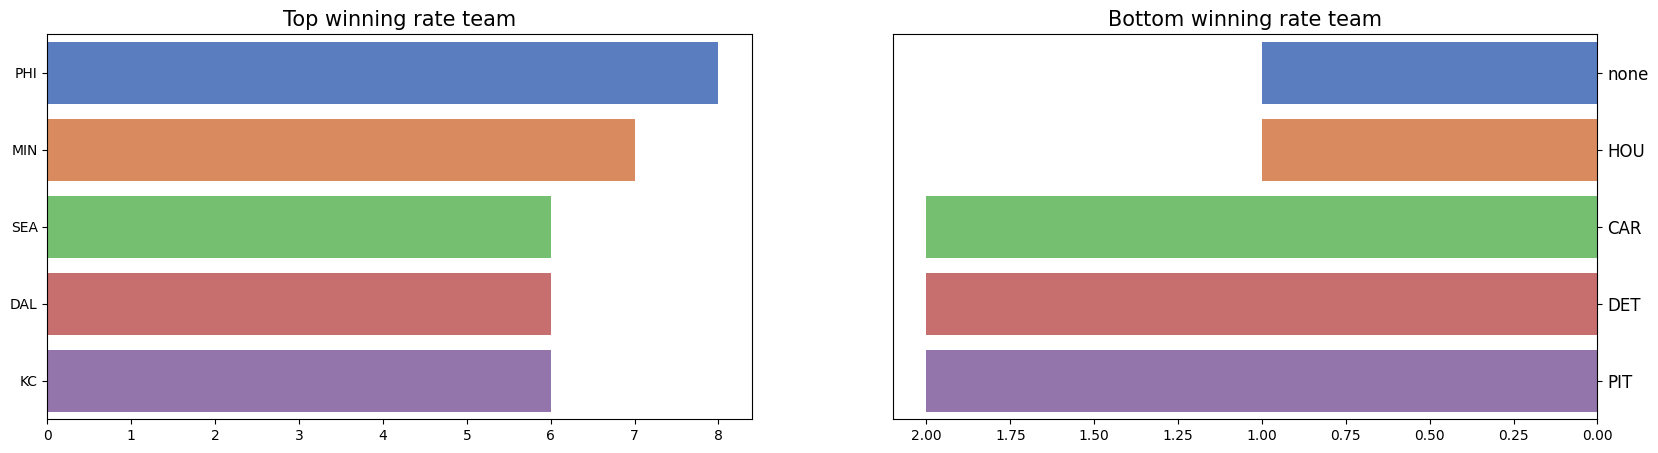

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="gameId", y="win", data=win_games_df.sort_values(by='gameId', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top winning rate team", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="gameId", y="win", data=win_games_df.sort_values(by='gameId', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom winning rate team", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

**Team paling sering kalah**


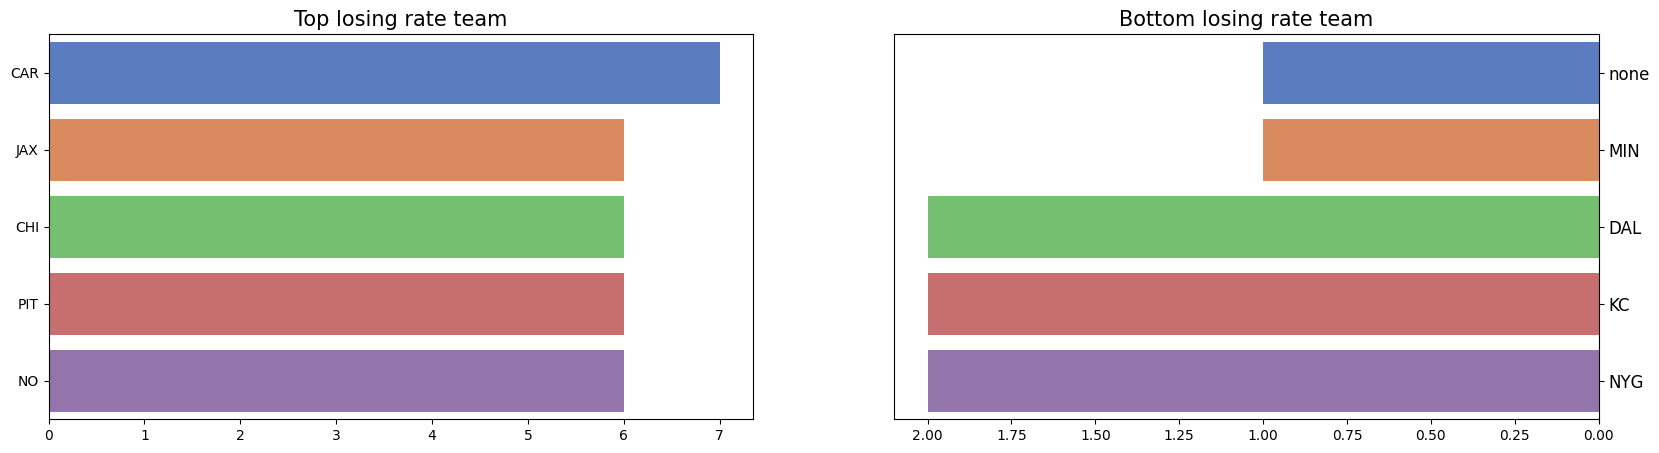

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x="gameId", y="lose", data=lose_games_df.sort_values(by='gameId', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top losing rate team", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x="gameId", y="lose", data=lose_games_df.sort_values(by='gameId', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom losing rate team", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()

**Jalannya pertandingan (masing-masing jumlah pertandinagn intens, normal, terpaut jauh)**

In [103]:
pertandingan_games_df = games_df.groupby(by='pertandingan').gameId.nunique().sort_values(ascending=False).reset_index()
pertandingan_games_df

,pertandingan,gameId
0,close_game,84
1,standard_contest,35
2,blowout,17


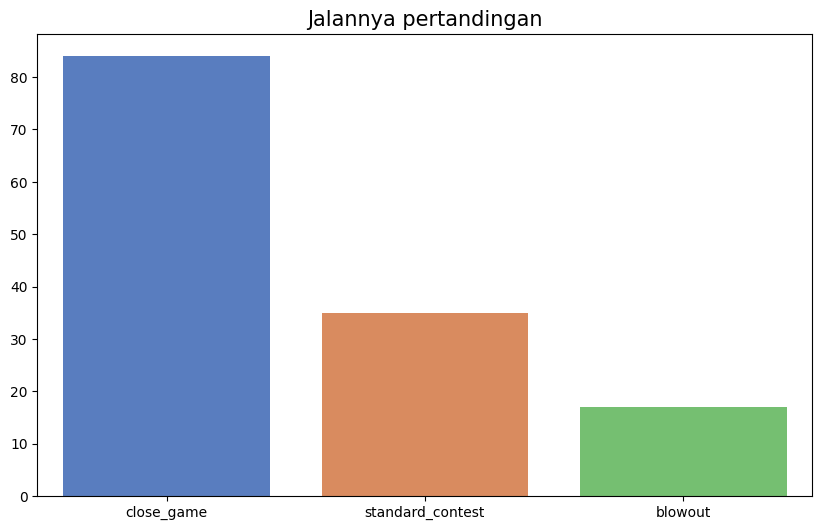

In [104]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="pertandingan", y="gameId", data=pertandingan_games_df.sort_values(by='gameId', ascending=False), palette='muted', ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Jalannya pertandingan", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=10)

plt.show()